In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

Данныe с Kaggle

In [2]:
df = pd.read_csv('train_.csv')
df.head()

,header_details,address,latitude,longitude,user_name,user_url,tel_number,price_dollars,Тип предложения,Серия,...,Пол,Безопасность,Возможность обмена,Возможность рассрочки,Возможность ипотеки,num_of_comments,Площадь участка,Канализация,Питьевая вода,Электричество
0,"2-комн. кв., 47 м2","Бишкек, Магистраль, Байтик Баатыра/Южная магис...",42.8198,74.6040,Моя Столица,https://www.house.kg/moya-stolitsa,+996 706 77-78-27,67000.0,от агента,элитка,...,ламинат,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"2-комн. кв., 42 м2","Бишкек, Политех, Чынгыз Айтматова/Ахунбаева",42.8424,74.5855,Сауле Телепергенов...,https://www.house.kg/megapolis-3,+996 558 71-88-07,54000.0,от агента,сталинка,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"3-комн. кв., 110 м2","Бишкек, Джал-29 м-н",42.8316,74.5661,БорБор Недвижимост...,https://www.house.kg/borbor-nedvizhimost-rusla...,+996 701 69-80-03,122000.0,от агента,элитка,...,паркет,"домофон, ...",обмен не предлагать,нет,нет,NaN,NaN,NaN,NaN,NaN
3,"2-комн. кв., 68 м2","Бишкек, Магистраль, Куттубаева/Южная Магистраль",42.8161,74.6228,Пользователь,https://www.house.kg/user/d5189d256e491cd4a628...,+996 550 94-00-11,92000.0,от собственника,элитка,...,ламинат,"охрана, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"1-комн. кв., 46 м2","Бишкек, Средний Джал м-н, мкр Джал-23 18/2",42.8403,74.5650,АН Амир Глобал,https://www.house.kg/an-amir-global,+996 556 03-14-16,69000.0,от агента,элитка,...,ламинат,домофон,NaN,нет,нет,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['header_details', 'address', 'latitude', 'longitude', 'user_name',
       'user_url', 'tel_number', 'price_dollars', 'Тип предложения', 'Серия',
       'Дом', 'Этаж', 'Площадь', 'Отопление', 'Состояние', 'Санузел', 'Газ',
       'Входная дверь', 'Парковка', 'Высота потолков', 'Разное',
       'Правоустанавливающие документы', 'views', 'hearts', 'publicated',
       'upped', 'pictures', 'Телефон', 'Интернет', 'Балкон', 'Мебель', 'Пол',
       'Безопасность', 'Возможность обмена', 'Возможность рассрочки',
       'Возможность ипотеки', 'num_of_comments', 'Площадь участка',
       'Канализация', 'Питьевая вода', 'Электричество'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3367 entries, 0 to 3366
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   header_details                  3364 non-null   object 
 1   address                         3367 non-null   object 
 2   latitude                        3364 non-null   float64
 3   longitude                       3364 non-null   float64
 4   user_name                       3367 non-null   object 
 5   user_url                        3367 non-null   object 
 6   tel_number                      3364 non-null   object 
 7   price_dollars                   3367 non-null   float64
 8   Тип предложения                 3364 non-null   object 
 9   Серия                           3364 non-null   object 
 10  Дом                             3364 non-null   object 
 11  Этаж                            3361 non-null   object 
 12  Площадь                         33

## Препроцессинг.

Выполните первый базовый тюнинг данных.. Более детальная предобработка будет выполнена на этапе аналитики.

* `header_details` - на основании данной фичи получить две с количеством комнат и площадью.
* Проверить на дупликаты и удалить их
* Удалить фичи, где слишком мало непустых значений.
* Удалить строки, где есть пропуски по самым необходимым фичам.
* Сделать и иной тип предобработки признаков на ваше усмотрение.
* Из адреса достать Регион (и) населенный пункт.

Весь данный этап оформить в виде лаконичного кода, который отработает и для тренировочных и тестовых данных.

### Extracting number of rooms and area

In [4]:
df['rooms'] = df.header_details.map(lambda x: x[0] if type(x) == str else x).map(lambda x: 0 if x == 'с' else x)

### Count NaNs and drop rows if there less than or equal 30% of columns

In [5]:
total_columns = len(df.columns)

nan_counts = df.isna().sum(axis=1)

threshold = total_columns * 0.7
df_cleaned = df[nan_counts <= threshold]

In [6]:
df_cleaned.head()

,header_details,address,latitude,longitude,user_name,user_url,tel_number,price_dollars,Тип предложения,Серия,...,Безопасность,Возможность обмена,Возможность рассрочки,Возможность ипотеки,num_of_comments,Площадь участка,Канализация,Питьевая вода,Электричество,rooms
0,"2-комн. кв., 47 м2","Бишкек, Магистраль, Байтик Баатыра/Южная магис...",42.8198,74.6040,Моя Столица,https://www.house.kg/moya-stolitsa,+996 706 77-78-27,67000.0,от агента,элитка,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,"2-комн. кв., 42 м2","Бишкек, Политех, Чынгыз Айтматова/Ахунбаева",42.8424,74.5855,Сауле Телепергенов...,https://www.house.kg/megapolis-3,+996 558 71-88-07,54000.0,от агента,сталинка,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,"3-комн. кв., 110 м2","Бишкек, Джал-29 м-н",42.8316,74.5661,БорБор Недвижимост...,https://www.house.kg/borbor-nedvizhimost-rusla...,+996 701 69-80-03,122000.0,от агента,элитка,...,"домофон, ...",обмен не предлагать,нет,нет,NaN,NaN,NaN,NaN,NaN,3
3,"2-комн. кв., 68 м2","Бишкек, Магистраль, Куттубаева/Южная Магистраль",42.8161,74.6228,Пользователь,https://www.house.kg/user/d5189d256e491cd4a628...,+996 550 94-00-11,92000.0,от собственника,элитка,...,"охрана, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,"1-комн. кв., 46 м2","Бишкек, Средний Джал м-н, мкр Джал-23 18/2",42.8403,74.5650,АН Амир Глобал,https://www.house.kg/an-amir-global,+996 556 03-14-16,69000.0,от агента,элитка,...,домофон,NaN,нет,нет,NaN,NaN,NaN,NaN,NaN,1


#### Extract Squres

In [8]:
df['Площадь'].isna().sum()

3

In [7]:
df_cleaned['Площадь'] = df_cleaned['Площадь'].map(lambda x: float(x.split()[0]))

/var/folders/8z/jvm5c3wx6s5_pxwl84cxhzxw0000gn/T/ipykernel_1974/1670164222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Площадь'] = df_cleaned['Площадь'].map(lambda x: float(x.split()[0]))


#### Drop duplicates

In [ ]:
df_cleaned.drop_duplicates(inplace=True)

In [8]:
needed_columns = ['address', 'latitude', 'longitude', 'price_dollars', 'Тип предложения', 'Серия',
       'Дом', 'Этаж', 'Площадь', 'Отопление', 'Состояние', 'Санузел', 'Газ',
       'Входная дверь', 'Парковка', 'Высота потолков', 'Разное',
       'Правоустанавливающие документы', 'Телефон', 'Интернет', 'Балкон', 'Мебель', 'Пол',
       'Безопасность', 'Возможность обмена', 'Возможность рассрочки',
       'Возможность ипотеки', 'rooms']

In [9]:
df_cleaned2 = df_cleaned[needed_columns]

### Change columns language to english

In [10]:
eng_cols = ['address', 'latitude', 'longitude', 'price_dollars', 'offer_type', 'series',
       'dom', 'floor', 'area', 'heating', 'condition', 'bathroom', 'gas',
       'front_door', 'parking', 'ceiling_height', 'another',
       'title_deeds', 'telephone', 'internet', 'balcony', 'furniture', 'flooring',
       'security', 'possibility_of_exchange', 'possibility_of_installments',
       'mortgage_possibility', 'rooms']

In [11]:
df_cleaned2.columns = eng_cols

In [12]:
df_cleaned2.columns

Index(['address', 'latitude', 'longitude', 'price_dollars', 'offer_type',
       'series', 'dom', 'floor', 'area', 'heating', 'condition', 'bathroom',
       'gas', 'front_door', 'parking', 'ceiling_height', 'another',
       'title_deeds', 'telephone', 'internet', 'balcony', 'furniture',
       'flooring', 'security', 'possibility_of_exchange',
       'possibility_of_installments', 'mortgage_possibility', 'rooms'],
      dtype='object')

### Extracting from general address: city, district and address

In [13]:
import re

def prepare_string(string:str)->str:
    house_number_pattern = re.compile(r'(?<!м-н)(?<!-мкр)(?<!ж/м)\s*\b\d+[a-zA-Zа-яА-Я]*\b|\b\d+/\d+\b')
    temp_str = string
    if '/' in string and 'ж/м' not in string:
        temp_str = string.split('/')[0]
    
    temp_str = temp_str.split()
    
    if temp_str[-1] not in ['м-н', 'мкр', 'ж/м'] and any(char.isdigit() for char in temp_str[-1]) and len(temp_str) >= 2:
        temp_str = temp_str[:-1]
            
    # temp_str = re.sub(r'\b\d+\s?[А-Г]?\b', '', temp_str)
    # temp_str = temp_str[:-1].append(last_item)

    return ' '.join(temp_str)
    # return string
    # else:
    #     ('ул.' in string or 'пер.' in string)
    # if all(char in allowed_chars for char in temp_str[-1]):
    #     return ' '.join(temp_str[:-1])
    # else:
    #     return house_number_pattern.sub('', string).strip()

In [14]:
# part: city, district, address

def get_sep_address(item, part='city'):
    try:
        temp = item.split(',')
        
        if part == 'city':
            if 'Бишкек' in temp[0]:
                return 'Бишкек'
            return prepare_string(temp[0].strip())
        elif part == 'district':
            if len(temp) >= 2:
               return prepare_string(temp[1].strip())
            else:
               return prepare_string(temp[0].strip())
        elif part == 'address':
            return temp[-1].strip()
    except Exception:
        return item

In [15]:
df_cleaned2['city'] = df_cleaned2.address.map(lambda x: get_sep_address(x))
df_cleaned2['district'] = df_cleaned2.address.map(lambda x: get_sep_address(x, 'district'))
df_cleaned2['addr'] = df_cleaned2.address.map(lambda x: get_sep_address(x, 'address'))

/var/folders/8z/jvm5c3wx6s5_pxwl84cxhzxw0000gn/T/ipykernel_1974/1651983115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned2['city'] = df_cleaned2.address.map(lambda x: get_sep_address(x))
/var/folders/8z/jvm5c3wx6s5_pxwl84cxhzxw0000gn/T/ipykernel_1974/1651983115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned2['district'] = df_cleaned2.address.map(lambda x: get_sep_address(x, 'district'))
/var/folders/8z/jvm5c3wx6s5_pxwl84cxhzxw0000gn/T/ipykernel_1974/1651983115.py:3: SettingWi

In [ ]:
df_cleaned2.drop('address', axis=1, inplace=True)

### Apply new column via 'Состояние' column

In [16]:
keywords_repair = ['евроремонт', 'хорошее', 'среднее']
keywords_no_repair = ['под самоотделку (псо)','не достроено']

def has_repair(row):
    if isinstance(row['condition'], str):
        text = row['condition'].lower()
        for keyword in keywords_repair:
            if keyword in text:
                return 'с ремонтом'
        for keyword in keywords_no_repair:
            if keyword in text:
                return 'без ремонта'
    return 'не определено'

df_cleaned2['renovation'] = df_cleaned2.apply(has_repair, axis=1)

/var/folders/8z/jvm5c3wx6s5_pxwl84cxhzxw0000gn/T/ipykernel_1974/2025584122.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned2['renovation'] = df_cleaned2.apply(has_repair, axis=1)


In [235]:
# df_cleaned2.drop('condition', axis=1, inplace=True)

### Getting floors and total floors

In [18]:
# 0 - floor, 1 - total floors
def get_floors(item, mode=0):
    try:
        temp = item.split()
        if mode:
            if temp[0] in ['цоколь', 'подвал']:
                return temp[-2]
            return temp[-1]
        else:
            if temp[0] in ['цоколь', 'подвал']:
                return 0
            return temp[0]
    except:
        return item

In [ ]:
df_cleaned2['total_floors'] = df_cleaned2['floor'].apply(lambda x: get_floors(x, 1))
df_cleaned2['floor'] = df_cleaned2['floor'].apply(lambda x: get_floors(x, 0))

### Splitting house type and year

In [21]:
# what: 'type' or 'year'
def get_dom_type_and_year(item, what='type'):
    try:
        temp = item.split(',')
        if what == 'type':
            return temp[0]
        elif what == 'year':
            if  len(temp) > 1:
                year = temp[1].split()
                return year[0].strip()
            else:
                return np.nan
    except:
        return item

In [60]:
df_cleaned2['dom_type'] = df_cleaned2.dom.map(lambda x: get_dom_type_and_year(x))

df_cleaned2.dom_type.unique()

/var/folders/8z/jvm5c3wx6s5_pxwl84cxhzxw0000gn/T/ipykernel_1974/2588201064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned2['dom_type'] = df_cleaned2.dom.map(lambda x: get_dom_type_and_year(x))


array(['монолитный', 'кирпичный', 'панельный'], dtype=object)

In [61]:
df_cleaned2['dom_year'] = df_cleaned2.dom.map(lambda x: get_dom_type_and_year(x, 'year'))

df_cleaned2.dom_year.unique()

/var/folders/8z/jvm5c3wx6s5_pxwl84cxhzxw0000gn/T/ipykernel_1974/969573491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned2['dom_year'] = df_cleaned2.dom.map(lambda x: get_dom_type_and_year(x, 'year'))


array(['2022', nan, '2024', '2020', '2021', '2005', '2023', '2017',
       '2019', '2016', '2018', '1985', '2013', '2025', '1994', '1979',
       '2006', '2007', '1992', '1975', '2015', '2011', '2014', '1990',
       '1988', '2010', '1980', '1997', '2009', '1966', '1999', '1987',
       '2026', '1958', '1968', '1984', '1972', '1993', '1965', '2012',
       '2008', '1989', '1970', '2003', '1969', '1967', '1978', '1964',
       '2001', '2027', '1981', '2000', '0', '1950', '1974', '2028',
       '1986', '1998', '1960', '1956', '1982', '1995', '1991', '1963',
       '1973', '1983', '1976', '1678', '1971', '1977', '1955'],
      dtype=object)

In [62]:
df_cleaned2.dom_year = df_cleaned2.dom_year.astype(float)

median_dom_year = df_cleaned2.groupby(['dom_type', 'series'])['dom_year'].median()

/var/folders/8z/jvm5c3wx6s5_pxwl84cxhzxw0000gn/T/ipykernel_1974/1813962409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned2.dom_year = df_cleaned2.dom_year.astype(float)


In [63]:
median_dom_year

dom_type    series              
кирпичный   102 серия               1980.0
            104 серия               1975.0
            104 серия улучшенная    1997.0
            105 серия               1981.0
            105 серия улучшенная    2007.5
            106 серия               1972.0
            106 серия улучшенная    2004.5
            107 серия               1973.0
            108 серия               2023.0
            индивид. планировка     2015.0
            малосемейка             1993.5
            пентхаус                2015.5
            сталинка                1960.0
            хрущевка                1967.5
            элитка                  2022.0
монолитный  102 серия               2024.0
            104 серия               1970.0
            104 серия улучшенная       NaN
            105 серия               1989.0
            105 серия улучшенная    2018.0
            106 серия               1992.0
            106 серия улучшенная    2023.0
            107 серия

Посмотрев на данные сверху можно заполнить NaN значением выше

In [64]:
median_dom_year.fillna(method='ffill', inplace=True)

/var/folders/8z/jvm5c3wx6s5_pxwl84cxhzxw0000gn/T/ipykernel_1974/2814986751.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  median_dom_year.fillna(method='ffill', inplace=True)


In [65]:
def fillna_dom_year(df:pd.DataFrame):
    temp_df = df.copy()
    ind = temp_df[temp_df.dom_year.isna()].index
    temp_col = temp_df['dom_year'].copy()
    
    for i in ind:
        temp_row = temp_df[temp_df.index == i]
        dom_type = temp_row['dom_type'].values[0]
        series = temp_row['series'].values[0]
        value = median_dom_year[median_dom_year.index == (dom_type, series)]
        temp_col[i] = value
        
    return temp_col
    
df_cleaned2['dom_year'] = fillna_dom_year(df_cleaned2)

/var/folders/8z/jvm5c3wx6s5_pxwl84cxhzxw0000gn/T/ipykernel_1974/3509805184.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  temp_col[i] = value
/var/folders/8z/jvm5c3wx6s5_pxwl84cxhzxw0000gn/T/ipykernel_1974/3509805184.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned2['dom_year'] = fillna_dom_year(df_cleaned2)


In [73]:
df_cleaned2.dom_year = df_cleaned2.dom_year.astype(int)

df_cleaned2.drop('dom', axis=1, inplace=True)

/var/folders/8z/jvm5c3wx6s5_pxwl84cxhzxw0000gn/T/ipykernel_1974/3652153642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned2.dom_year = df_cleaned2.dom_year.astype(int)


### Working with floor nan

In [188]:
# Функция для преобразования этажа
def transform_floor(floor, total_floors):
    try:
        # # Преобразование: функция, которая даёт большие значения для средних этажей
        transformed_value = 1 - 4 * ((floor - (total_floors / 2)) / total_floors)**2
        # transformed_value = 1 - abs(floor - (total_floors / 2)) / (total_floors / 2)
    
    # Нормализуем для возврата в диапазон от 0 до 1
        if transformed_value < 0.0:
            transformed_value = 0.0
        return transformed_value
    except:
        return np.nan

In [86]:
# Заполняет нуллы медианой 
def fillna_floors_by_dom(df:pd.DataFrame, col='total_floors'):
    median_floor = df.groupby(['dom_type', 'series'])[col].median()
    ind = df[df[col].isna()].index
    temp_col = df[col].copy()
    
    for i in ind:
        temp_row = df[df.index == i]
        dom_type = temp_row['dom_type'].values[0]
        series = temp_row['series'].values[0]
        value = median_floor[median_floor.index == (dom_type, series)]
        temp_col[i] = value
    
    return temp_col


def fillna_floors(df:pd.DataFrame, col='total_floors'):
    test_df = df.copy()
    test_df[col] = test_df[col].astype(float)
    
    median_floor = test_df.groupby('district', as_index=False)[col].median()
    ind = test_df[test_df[col].isna()].index
    temp_col = test_df[col].copy()
    
    for i in ind:
        district = test_df[test_df.index == i]['district'].values[0]
        value = median_floor[median_floor['district'] == district][col].values[0]
        temp_col[i] = value
        
    if temp_col.isna().any():
        test_df[col] = temp_col
        temp_col = fillna_floors_by_dom(test_df, col)
    
    return temp_col

In [ ]:
df_cleaned2['total_floors'] = fillna_floors(df_cleaned2, 'total_floors')

df_cleaned2['floor'] = fillna_floors(df_cleaned2, 'floor')

In [199]:
def get_floor_score(df:pd.DataFrame, floor_col='floor', totalf_col='total_floors')->pd.Series:
    res = []
    for f, t in zip(df[floor_col], df[totalf_col]):
        res.append(transform_floor(f, t))
    return pd.Series(res, index=df.index)

In [ ]:
df_cleaned2['floor_score'] = get_floor_score(df_cleaned2)

Now we can drop floor and total_floors columns, we dont need them anymore

In [ ]:
df_cleaned2.drop(['floor', 'total_floors'], axis=1, inplace=True)

### Обработка высоты потолков

In [207]:
def scaling_ceiling_heights(height)->float:
    try:
        temp = float(height.split()[0])
        
        if temp > 6.0:
            temp = str(temp)
            temp = temp[0] + '.' + temp[1:-2]
            temp = float(temp)
        return temp    
    except:
        return height

In [ ]:
df_cleaned2['ceiling_height'] = df_cleaned2['ceiling_height'].map(scaling_ceiling_heights)

In [227]:
def fillna_ceil_height(df:pd.DataFrame)->pd.Series:
    dict_ = {'элитка': 3.25,
    'сталинка': 3.35,
    'индивид. планировка': 3.05,
    '106 серия': 2.6,
    '106 серия улучшенная': 2.75,
    'малосемейка': 2.55,
    'хрущевка': 2.55,
    '105 серия': 2.6,
    '104 серия': 2.6,
    'пентхаус': 4.0,
    '108 серия': 2.65,
    '107 серия': 2.65,
    '104 серия улучшенная': 2.75,
    '105 серия улучшенная': 2.75,
    '102 серия': 2.6,}

    temp_df = df.copy()
    ind = temp_df[temp_df['ceiling_height'].isna()].index
    for i in ind:
        temp_df.loc[i,'ceiling_height'] = dict_.get(temp_df.loc[i, 'series'])
        
    return temp_df['ceiling_height']

In [ ]:
df_cleaned2['ceiling_height'] = fillna_ceil_height(df_cleaned2)

In [258]:
df_cleaned2.columns

Index(['address', 'latitude', 'longitude', 'price_dollars', 'offer_type',
       'series', 'area', 'heating', 'bathroom', 'gas', 'front_door', 'parking',
       'ceiling_height', 'another', 'title_deeds', 'telephone', 'internet',
       'balcony', 'furniture', 'flooring', 'security',
       'possibility_of_exchange', 'possibility_of_installments',
       'mortgage_possibility', 'rooms', 'city', 'district', 'addr',
       'renovation', 'dom_type', 'dom_year', 'floor_score', 'floor',
       'total_floors', 'condition'],
      dtype='object')

In [257]:
df_cleaned2.groupby(['district'])

In [260]:
df_cleaned2.loc[:, ['district', 'condition', 'heating']]

,district,condition,heating
0,Магистраль,хорошее,автономное
1,Политех,хорошее,центральное
2,Джал-29 м-н,хорошее,центральное
3,Магистраль,евроремонт,на газе
4,Средний Джал м-н,евроремонт,центральное
...,...,...,...
3362,ул.Рыскулова,под самоотделку (псо),NaN
3363,7 м-н,NaN,NaN
3364,с. Алга,хорошее,электрическое
3365,Горького - Алма-Атинская,евроремонт,на газе


In [246]:
df[df.rooms == 0]

,header_details,address,latitude,longitude,user_name,user_url,tel_number,price_dollars,Тип предложения,Серия,...,Безопасность,Возможность обмена,Возможность рассрочки,Возможность ипотеки,num_of_comments,Площадь участка,Канализация,Питьевая вода,Электричество,rooms
243,"свободная планировка кв., 880 м2","Бишкек, 8 м-н, Жукеева-Пудовкина 87/2",42.8277,74.6124,The.level.group,https://www.house.kg/the-level-group,+996 997 15-15-55,528000.0,от агента,элитка,...,охрана,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
628,"свободная планировка кв., 51.79 м2","Иссык-Кульская область, Балыкчы",42.4594,76.2325,Пользователь,https://www.house.kg/user/a74bdec9fad077243929...,+996 990 93-96-29,62148.0,от агента,индивид. планировка,...,"охрана, ...",рассмотрю варианты,есть,нет,NaN,NaN,NaN,NaN,NaN,0
1038,"свободная планировка кв., 70.64 м2","Иссык-Кульская область, Балыкчы",42.4596,76.2325,Пользователь,https://www.house.kg/user/a74bdec9fad077243929...,+996 990 93-96-29,84768.0,от агента,индивид. планировка,...,"охрана, ...",рассмотрю варианты,есть,нет,NaN,NaN,NaN,NaN,NaN,0
2308,"свободная планировка кв., 44 м2","Бишкек, Асанбай м-н",42.8145,74.6315,Пользователь,https://www.house.kg/user/372de38527c34859f58a...,+996 755 75-00-51,73500.0,от агента,элитка,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2640,"свободная планировка кв., 45.5 м2","Бишкек, АЮ Grand, Исакеева 2",42.8593,74.6821,V,https://www.house.kg/user/0953a75cc830e9aad7a4...,+996 555 00-23-44,62990.0,от собственника,элитка,...,"решетки на окнах, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3109,"свободная планировка кв., 500 м2","Бишкек, Советская - Скрябина, Медерова/Элебаева",42.8526,74.6131,ПроФи,https://www.house.kg/profi,+996 551 70-10-07,450000.0,от агента,элитка,...,"сигнализация, ...",обмен не предлагать,есть,есть,NaN,NaN,NaN,NaN,NaN,0


## Аналитика.

Предполагает командну работу. Аналитика - важнейший этап, предваряющий само моделирование. К ней стоит подойти ответственно и тщательно.

Тут я напишу вопросы, которые сами напрашиваются. Дело в том, что представленные признаки не все могут быть полезными, и с какими стоит работать еще предстоит выяснить. Также на основании данных признаков можно понаделать новые... Буду писать основные идеи по порядку а затем, эти поинты необходимо распределить среди участников и отработать. После этого все результаты важно  совместно обсудить. (К-командная работа)

Основные проблематики:
1. Пропуски.. Есть слабо заполненные фичи. Просто удалить их можно, но если в них есть +\- треть непустых наблюдений, стоит все же уделить им внимание. Может быть "пропуск" тоже вполне себе признак. Выполните t-test или кор тест для непустых значений и оцените, насколько эта фича вам вообще полезна. Используйте визуализацю. Можете также сделать семпл данных и обучить какую-то модельку и посмотреть на коэффициенты. Возможно, есть признаки, которые вы определенно точно удалите.

2. Инжиниринг. По категориальным признакам необходимо принять решение как их энкодить.. Сперва их нужно изучить.. какие они формируют группы и каковы там изменчивости целевой переменной. Особенно это касается Региона и населенного пункта. По регионам - сколько у нас данных по каждому? Скорее всего данные нужно разделить, но какие-то регионы объединить в один сегмент. *Координаты* - это тоже признак с которым нужно поработать. Для Столицы там свои фишки, для регионов свои. На что смотрим - на "гранулы", то есть на наличие "групп", в которых целевая переменная как-то объясняется специфической локацией. Тут открывается возможность наделать кучу категориальных и количественных признаков на основании координат. Сами координаты для моделирования оставлять не стоит. ОЧень полезно смотреть не на полную стоимость а на стоимость одного квадратного метра. Не стоит забывать про L1 регуляризацию. Можно обучить пробную модель и посмотреть, какие признаки будут занулены. По совокупности факторов принять решение, какие признаки хороши а какие нет.

3. Аномалии и выбросы. Стоит внимательно изучить количественные признаки в особенности целевую. Чистка данных - это важный поинт. Тут поможет как разного рода погрупповая визуализация так и обучение пробной модели с анализом ошибок!

Такой подход необходимо применить к каждому признаку. Признаки можно распределить среди участников а с координатами поработать совместно.

После выполнения аналитики у вас будет масса инсайтов, выводов и графиков. Стоит все результаты совместно обсудить и сформулировать гипотезы о том, как будет проходить процесс моделирования.

In [408]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import SGDRegressor
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [262]:
df_cleaned2.columns

Index(['address', 'latitude', 'longitude', 'price_dollars', 'offer_type',
       'series', 'area', 'heating', 'bathroom', 'gas', 'front_door', 'parking',
       'ceiling_height', 'another', 'title_deeds', 'telephone', 'internet',
       'balcony', 'furniture', 'flooring', 'security',
       'possibility_of_exchange', 'possibility_of_installments',
       'mortgage_possibility', 'rooms', 'city', 'district', 'addr',
       'renovation', 'dom_type', 'dom_year', 'floor_score', 'floor',
       'total_floors', 'condition'],
      dtype='object')

In [336]:
test_df = df_cleaned2[['price_dollars', 'offer_type',
       'series', 'area', 'heating', 'bathroom', 'gas', 'front_door', 'parking',
       'ceiling_height', 'title_deeds', 'telephone', 'internet',
       'balcony', 'furniture', 'flooring', 'security',
       'possibility_of_exchange', 'possibility_of_installments',
       'mortgage_possibility', 'rooms', 'city', 'district', 'addr',
       'renovation', 'dom_type', 'dom_year', 'floor_score', 'condition']]

In [ ]:
test_df.drop(['title_deeds', 'security'], axis=1, inplace=True)

In [316]:
# в group_by последним элементом должна находить колонка, которую надо заполнить
def get_max_values(df:pd.DataFrame, group_by=['condition', 'heating']):
    grouped_df = df.groupby(group_by).agg(count=('price_dollars', 'size')).reset_index()
    max_count_df = grouped_df.loc[grouped_df.groupby(group_by[0])['count'].idxmax()]
    
    ind = df[df[group_by[-1]].isna()].index
    temp_df = df.copy()
    for i in ind:
        try:
            item = temp_df.loc[i]
            value = max_count_df[max_count_df[group_by[0]] == item[group_by[0]]][group_by[-1]].values[0]
            temp_df.loc[i, group_by[-1]] = value
        except:
            continue
        
    return temp_df[group_by[-1]]

In [ ]:
# Заполняем condition популярным значением
test_df['condition'] = get_max_values(test_df, ['series', 'condition'])

In [ ]:
# Заполняем heating популярным значением
test_df['heating'] = get_max_values(test_df, ['condition', 'heating'])

In [ ]:
# Заполняем bathroom популярным значением
test_df['bathroom'] = get_max_values(test_df, ['condition', 'bathroom'])

In [ ]:
# Заполняем gas популярным значением
test_df['gas'] = get_max_values(test_df, ['condition', 'gas'])

In [ ]:
# Заполняем front_door популярным значением
test_df['front_door'] = get_max_values(test_df, ['condition', 'front_door'])

In [ ]:
# Заполняем parking популярным значением
test_df['parking'] = get_max_values(test_df, ['condition', 'parking'])

In [ ]:
# Заполняем telephone популярным значением
test_df['telephone'] = get_max_values(test_df, ['series', 'telephone'])

In [ ]:
# Заполняем internet популярным значением
test_df['internet'] = get_max_values(test_df, ['series', 'internet'])

In [ ]:
# Заполняем balcony популярным значением
test_df['balcony'] = get_max_values(test_df, ['condition', 'balcony'])

In [ ]:
# Заполняем furniture популярным значением
test_df['furniture'] = get_max_values(test_df, ['condition', 'furniture'])

In [ ]:
# Заполняем flooring популярным значением
test_df['flooring'] = get_max_values(test_df, ['condition', 'flooring'])

In [ ]:
test_df['possibility_of_exchange'].fillna('обмен не предлагать', inplace=True)
test_df['possibility_of_installments'].fillna('нет', inplace=True)
test_df['mortgage_possibility'].fillna('нет', inplace=True)

In [ ]:
test_df.rooms = test_df.rooms.astype(int)

In [389]:
test_df.columns

Index(['price_dollars', 'offer_type', 'series', 'area', 'heating', 'bathroom',
       'gas', 'front_door', 'parking', 'ceiling_height', 'telephone',
       'internet', 'balcony', 'furniture', 'flooring',
       'possibility_of_exchange', 'possibility_of_installments',
       'mortgage_possibility', 'rooms', 'city', 'district', 'addr',
       'renovation', 'dom_type', 'dom_year', 'floor_score', 'condition'],
      dtype='object')

In [395]:
X = test_df.drop('price_dollars', axis=1)
y = test_df['price_dollars']

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [403]:
numeric_features = X.select_dtypes([np.number]).columns
categorical = X.dtypes[test_df.dtypes == "object"].index.tolist()

In [404]:
# Преобразования для категориальных и числовых признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Стандартизация числовых признаков
        ('cat', TargetEncoder(), categorical)  # Target Encoding для категориальных признаков
    ]
)

In [413]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SGDRegressor(random_state=42))  # Модель (Random Forest)
])

In [414]:
model_pipeline.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = model_pipeline.predict(X_test)

# Оценка качества модели
mean_squared_error(y_test, y_pred)

1.4539760093404973e+39

In [419]:
sgd_model = model_pipeline.named_steps['model']

<Axes: ylabel='None'>

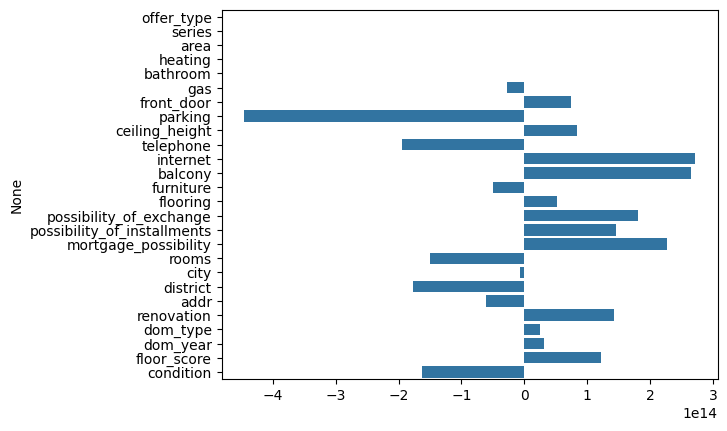

In [420]:
sns.barplot(x=sgd_model.coef_.squeeze(), y=X.columns)

## Моделирование

На этапе аналитики вы сформулируете ряд гипотез. Их необходимо распределить среди участников и отработать. Процесс подбора гиперпараметров стоит также распределить как и работу с разными сегментами данных.